# 외국인 관광객 통계
#### 국적별로 외국인 관광객의 숫자에는 어떤 패턴이 있는지, 외국인 관광객이 증가한(또는 감소한) 원인이 되는 이벤트는 무엇인지 파악

# 외국인 출입국 통계 데이터 구하기 
#### 한국관광공사에서는 방한 와래관광객과 국민 해외관광객의 통계자료를 2003년 1월부터 매월 발표한다.
#### 이 자료는 성별, 목적별, 연령별, 교통수단별, 국적별로 집계되어 있음.
#### "월별 와래객 입국- 목적별/국적별" 통계 데이터 분석 및 시각화 
#### 2010년 1월부터 2019년 8월까지의 데이터를 엑셀로 저장해 두었음. 이를 활용해 분석

![ex_screenshot](./img/그림3-2.png)

#### 한국관광데이터랩
https://datalab.visitkorea.or.kr/datalab/portal/main/getMainForm.do

# 데이터 불러오기 및 전처리
#### 2010년 1월부터 2019년 8월가지 총 116개의 엑셀 파일

#### 목적별/국적별 외래객 데이터의 형태 
![ex_screenshot](./img/그림3-4.png)
#### 중간생략
![ex_screenshot](./img/그림3-4_1.png)

### 불러올 데이터의 형태 파악
#### 1. 첫 번째 row에는 제목에 해당하는 어느 시점의 어떤 종류의 데이터인지 서술(데이터 불러올 때 제외)
#### 2. 두 번째 row에는 총 10개의 컬럼이 순서대로 나열(A부터 G까지 활용)
#### 3. 3 - 69 번째 row에는 대륙, 국가에 따른 관광객 수 데이터가 구성되어 있음(실제 데이터 분석에 사용할 항목들임)
#### 4. 70 - 73 번째 row에는 계, 전년동기, 성장률, 구성비 등의 데이터 요약(데이터 불러올 때 제외)

In [3]:
# kto_201901.xlsx 엑셀 데이터 불러오기
import pandas as pd 
kto_201901 = pd.read_excel('./files/kto_201901.xlsx', 
                          header=1,         #컬럼이름은 두번빼 줄에 위치
                          usecols='A:G',    
                          skipfooter=4)     #마지막 4개의 row는 불러오지 않는다.
kto_201901.head()

,국적,관광,상용,공용,유학/연수,기타,계
0,아시아주,765082,10837,1423,14087,125521,916950
1,일본,198805,2233,127,785,4576,206526
2,대만,86393,74,22,180,1285,87954
3,홍콩,34653,59,2,90,1092,35896
4,마카오,2506,2,0,17,45,2570


### 데이터 전처리 하기
#### 데이터를 탐색하고, 분석에 적합하도록 원하는 형태로 가공한다.
#### 이런 과정을 데이터 전처리(Data Preprocessing), 데이터 가공(Data Manipulation), 데이터 클렌징(Data Cleansing), 또는 
#### 데이터 핸들링(Data Handling)이라고 한다.
#### 데이터 변수별로 값에 이상이없는지 확인, 결측값 처리, 이상치 처리, 변수 정규화, 파생변수 생성 등의 과정이 포함된다.

In [4]:
kto_201901.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적      67 non-null     object
 1   관광      67 non-null     int64 
 2   상용      67 non-null     int64 
 3   공용      67 non-null     int64 
 4   유학/연수   67 non-null     int64 
 5   기타      67 non-null     int64 
 6   계       67 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.8+ KB


In [5]:
kto_201901.describe()

,관광,상용,공용,유학/연수,기타,계
count,67.00000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,26396.80597,408.208955,132.507463,477.462687,5564.208955,32979.194030
std,102954.04969,1416.040302,474.406339,2009.484800,17209.438418,122821.369969
min,0.00000,0.000000,0.000000,0.000000,16.000000,54.000000
25%,505.00000,14.500000,2.500000,17.500000,260.000000,927.000000
50%,1304.00000,45.000000,14.000000,43.000000,912.000000,2695.000000
75%,8365.00000,176.500000,38.000000,182.000000,2824.500000,14905.500000
max,765082.00000,10837.000000,2657.000000,14087.000000,125521.000000,916950.000000


In [6]:
kto_201901.head(10)

,국적,관광,상용,공용,유학/연수,기타,계
0,아시아주,765082,10837,1423,14087,125521,916950
1,일본,198805,2233,127,785,4576,206526
2,대만,86393,74,22,180,1285,87954
3,홍콩,34653,59,2,90,1092,35896
4,마카오,2506,2,0,17,45,2570
5,태국,34004,37,199,96,6998,41334
6,말레이시아,19043,95,7,99,2821,22065
7,필리핀,14279,211,161,184,15638,30473
8,인도네시아,14183,136,38,187,4298,18842
9,싱가포르,8372,94,8,48,1333,9855


In [7]:
condition = (kto_201901['관광']==0) \
             | (kto_201901['상용']==0) \
             | (kto_201901['공용']==0) \
             | (kto_201901['유학/연수']==0) 
kto_201901[condition]

,국적,관광,상용,공용,유학/연수,기타,계
4,마카오,2506,2,0,17,45,2570
20,이스라엘,727,12,0,9,57,805
22,우즈베키스탄,1958,561,0,407,2828,5754
38,스위스,613,18,0,19,97,747
45,그리스,481,17,4,0,273,775
46,포르투갈,416,14,0,13,121,564
51,크로아티아,226,12,0,3,250,491
54,폴란드,713,10,0,27,574,1324
59,대양주 기타,555,3,4,0,52,614
63,기타대륙,33,4,0,1,16,54


In [8]:
condition = (kto_201901['관광']==0) | (kto_201901['상용']==0) | (kto_201901['공용']==0) | (kto_201901['유학/연수']==0) 
kto_201901[condition]

,국적,관광,상용,공용,유학/연수,기타,계
4,마카오,2506,2,0,17,45,2570
20,이스라엘,727,12,0,9,57,805
22,우즈베키스탄,1958,561,0,407,2828,5754
38,스위스,613,18,0,19,97,747
45,그리스,481,17,4,0,273,775
46,포르투갈,416,14,0,13,121,564
51,크로아티아,226,12,0,3,250,491
54,폴란드,713,10,0,27,574,1324
59,대양주 기타,555,3,4,0,52,614
63,기타대륙,33,4,0,1,16,54


In [9]:
#기준년월 컬럼 생성
kto_201901['기준년월'] = '2019-01'
kto_201901.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,아시아주,765082,10837,1423,14087,125521,916950,2019-01
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01


In [10]:
nation = kto_201901['국적'].unique()
print(nation)

['아시아주' '일본' '대만' '홍콩' '마카오' '태국' '말레이시아' '필리핀' '인도네시아' '싱가포르' '미얀마' '베트남'
 '인도' '스리랑카' '파키스탄' '방글라데시' '캄보디아' '몽골' '중국' '이란' '이스라엘' '터키' '우즈베키스탄'
 '카자흐스탄' 'GCC' '아시아 기타' '미주' '미국' '캐나다' '멕시코' '브라질' '미주 기타' '구주' '영국' '독일'
 '프랑스' '네덜란드' '스웨덴' '스위스' '이탈리아' '덴마크' '노르웨이' '벨기에' '오스트리아' '스페인' '그리스'
 '포르투갈' '핀란드' '아일랜드' '우크라이나' '러시아' '크로아티아' '루마니아' '불가리아' '폴란드' '구주 기타'
 '대양주' '오스트레일리아' '뉴질랜드' '대양주 기타' '아프리카주' '남아프리카공화국' '아프리카 기타' '기타대륙'
 '국적미상' '교포소계' '교포']


In [11]:
#대륙목록
continents_list = ['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']

#대륙목록 해당 값 삭제하기
condition = (kto_201901.국적.isin(continents_list) == False)
kto_201901_country = kto_201901[condition]
kto_201901_country['국적'].unique()

array(['일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아', '싱가포르',
       '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골', '중국',
       '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미국',
       '캐나다', '멕시코', '브라질', '미주 기타', '영국', '독일', '프랑스', '네덜란드', '스웨덴',
       '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인', '그리스', '포르투갈',
       '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아', '불가리아', '폴란드',
       '구주 기타', '오스트레일리아', '뉴질랜드', '대양주 기타', '남아프리카공화국', '아프리카 기타',
       '국적미상', '교포'], dtype=object)

In [12]:
kto_201901_country_newindex = kto_201901_country.reset_index(drop=True)
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,일본,198805,2233,127,785,4576,206526,2019-01
1,대만,86393,74,22,180,1285,87954,2019-01
2,홍콩,34653,59,2,90,1092,35896,2019-01
3,마카오,2506,2,0,17,45,2570,2019-01
4,태국,34004,37,199,96,6998,41334,2019-01


In [13]:
#대륙컬럼 만들기
continents = ['아시아']*25 + ['아메리카']*5 + ['유럽']*23 + ['오세아니아']*3 + ['아프리카']*2 + ['기타대륙'] + ['교포'] 
print(continents)

['아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아메리카', '아메리카', '아메리카', '아메리카', '아메리카', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '오세아니아', '오세아니아', '오세아니아', '아프리카', '아프리카', '기타대륙', '교포']


In [14]:
kto_201901_country_newindex['대륙'] = continents
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아
1,대만,86393,74,22,180,1285,87954,2019-01,아시아
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아
3,마카오,2506,2,0,17,45,2570,2019-01,아시아
4,태국,34004,37,199,96,6998,41334,2019-01,아시아


In [15]:
#관광객비율(%) 컬럼 만들기
kto_201901_country_newindex['관광객비율(%)'] = \
round(kto_201901_country_newindex['관광']/kto_201901_country_newindex['계'] * 100, 1)
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.3


In [16]:
kto_201901_country_newindex.sort_values(by = '관광객비율(%)',ascending = False)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3
55,대양주 기타,555,3,4,0,52,614,2019-01,오세아니아,90.4
19,이스라엘,727,12,0,9,57,805,2019-01,아시아,90.3
53,오스트레일리아,12795,93,17,34,1346,14285,2019-01,오세아니아,89.6
23,GCC,1550,37,14,72,103,1776,2019-01,아시아,87.3
5,말레이시아,19043,95,7,99,2821,22065,2019-01,아시아,86.3
34,스웨덴,844,29,6,18,85,982,2019-01,유럽,85.9


In [17]:
kto_201901_country_newindex.pivot_table(values='관광객비율(%)', index='대륙', aggfunc='mean')

,관광객비율(%)
대륙,
교포,0.000000
기타대륙,61.100000
아메리카,68.200000
아시아,59.624000
아프리카,32.700000
오세아니아,84.833333
유럽,63.826087


In [18]:
tourist_sum = sum(kto_201901_country_newindex['관광'])
tourist_sum

884293

In [19]:
#관광객비율(%) 컬럼 만들기
kto_201901_country_newindex['전체비율(%)'] = \
round(kto_201901_country_newindex['관광']/tourist_sum * 100, 1)
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3,22.5
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2,9.8
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5,3.9
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5,0.3
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.3,3.8


In [20]:
kto_201901_country_newindex.sort_values('전체비율(%)', ascending=False).head(10)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,320113,2993,138,8793,60777,392814,2019-01,아시아,81.5,36.2
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3,22.5
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2,9.8
25,미국,42989,418,2578,229,16523,62737,2019-01,아메리카,68.5,4.9
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5,3.9
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.3,3.8
5,말레이시아,19043,95,7,99,2821,22065,2019-01,아시아,86.3,2.2
47,러시아,17260,181,37,191,7525,25194,2019-01,유럽,68.5,2.0
6,필리핀,14279,211,161,184,15638,30473,2019-01,아시아,46.9,1.6
7,인도네시아,14183,136,38,187,4298,18842,2019-01,아시아,75.3,1.6


### 데이터 전처리 과정 함수로 만들기 

In [21]:
# create_kto_data 함수 생성하기 
def create_kto_data(yy, mm):  
    #1. 불러올 Excel 파일 경로를 지정해주기
    file_path = './files/kto_{}{}.xlsx'.format(yy, mm)  #'{인덱스0}, {인덱스1}'.format(값0, 값1)
    
    # 2. Excel 파일 불러오기 
    df = pd.read_excel(file_path, header=1, skipfooter=4, usecols='A:G')
    
    # 3. "기준년월" 컬럼 추가하기 
    df['기준년월'] = '{}-{}'.format(yy, mm) 
    
    # 4. "국적" 컬럼에서 대륙 제거하고 국가만 남기기 
    ignore_list = ['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']    # 제거할 대륙명 선정하기 
    condition = (df['국적'].isin(ignore_list) == False)    # 대륙 미포함 조건 
    df_country = df[condition].reset_index(drop=True) 
    
    # 5. "대륙" 컬럼 추가하기 
    continents = ['아시아']*25 + ['아메리카']*5 + ['유럽']*23 + ['대양주']*3 + ['아프리카']*2 + ['기타대륙'] + ['교포']    # 대륙 컬럼 생성을 위한 목록 만들어 놓기 
    df_country['대륙'] = continents   
                       
    # 6. 국가별 "관광객비율(%)" 컬럼 추가하기 
    df_country['관광객비율(%)'] = round(df_country.관광 / df_country.계 * 100, 1) 
                       
    # 7. "전체비율(%)" 컬럼 추가하기 
    tourist_sum = sum(df_country['관광'])
    df_country['전체비율(%)'] = round(df_country['관광'] / tourist_sum * 100, 1)
    
    # 8. 결과 출력하기 
    return(df_country)


In [22]:
# create_kto_data() 함수를 활용해서 2018년 12월 데이터 불러오기  
kto_test = create_kto_data(2018, 12)
kto_test.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,252461,1698,161,608,3593,258521,2018-12,아시아,97.7,22.7
1,대만,85697,71,22,266,1252,87308,2018-12,아시아,98.2,7.7
2,홍콩,58355,41,3,208,939,59546,2018-12,아시아,98.0,5.2
3,마카오,6766,0,1,20,36,6823,2018-12,아시아,99.2,0.6
4,태국,47242,42,302,58,6382,54026,2018-12,아시아,87.4,4.2


### 반복문(for문)을 통해 다수의 엑셀 데이터 불러와서 합치기 

In [23]:
# 이중 반복문으로 기준년월 출력하기 
for yy in range(2010, 2020): 
    for mm in range(1, 13): 
        yymm = '{}{}'.format(yy, mm)
        print(yymm)

20101
20102
20103
20104
20105
20106
20107
20108
20109
201010
201011
201012
20111
20112
20113
20114
20115
20116
20117
20118
20119
201110
201111
201112
20121
20122
20123
20124
20125
20126
20127
20128
20129
201210
201211
201212
20131
20132
20133
20134
20135
20136
20137
20138
20139
201310
201311
201312
20141
20142
20143
20144
20145
20146
20147
20148
20149
201410
201411
201412
20151
20152
20153
20154
20155
20156
20157
20158
20159
201510
201511
201512
20161
20162
20163
20164
20165
20166
20167
20168
20169
201610
201611
201612
20171
20172
20173
20174
20175
20176
20177
20178
20179
201710
201711
201712
20181
20182
20183
20184
20185
20186
20187
20188
20189
201810
201811
201812
20191
20192
20193
20194
20195
20196
20197
20198
20199
201910
201911
201912


In [24]:
# 숫자 1 출력하기 
mm = 1 
print(mm) 

1


In [25]:
# zfill() 함수 이용하기 1(0을 포함한 두 자리로 출력하기)
print(str(mm).zfill(2))

01


In [26]:
# zfill() 함수 이용하기 1(0을 포함한 3자리, 4자리로 출력하기)
print(str(mm).zfill(3))
print(str(mm).zfill(4))

001
0001


In [27]:
# 6자리로 정렬하여 기준년월 출력하기 
for yy in range(2010, 2020):
    for mm in range(1, 13):
        mm_str = str(mm).zfill(2)
        yymm = '{}{}'.format(yy, mm_str)
        print(yymm)

201001
201002
201003
201004
201005
201006
201007
201008
201009
201010
201011
201012
201101
201102
201103
201104
201105
201106
201107
201108
201109
201110
201111
201112
201201
201202
201203
201204
201205
201206
201207
201208
201209
201210
201211
201212
201301
201302
201303
201304
201305
201306
201307
201308
201309
201310
201311
201312
201401
201402
201403
201404
201405
201406
201407
201408
201409
201410
201411
201412
201501
201502
201503
201504
201505
201506
201507
201508
201509
201510
201511
201512
201601
201602
201603
201604
201605
201606
201607
201608
201609
201610
201611
201612
201701
201702
201703
201704
201705
201706
201707
201708
201709
201710
201711
201712
201801
201802
201803
201804
201805
201806
201807
201808
201809
201810
201811
201812
201901
201902
201903
201904
201905
201906
201907
201908
201909
201910
201911
201912


In [28]:
# 데이터를 담을 빈 데이터프레임 만들기 
df = pd.DataFrame()

In [29]:
# 패턴 분석결과를 이중 반복문을 통해 구현
for yy in range(2010, 2019):
    for mm in range(1, 13):
        temp = create_kto_data(str(yy), str(mm).zfill(2))
        df = pd.concat([df, temp], ignore_index=True)
        
for yy in range(2019, 2020):
    for mm in range(1, 9):
        temp = create_kto_data(str(yy), str(mm).zfill(2))
        df = pd.concat([df, temp], ignore_index=True)

In [30]:
# df 데이터 head() 함수로 확인하기
df.head()
#df.tail()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [31]:
# df 데이터 tail() 함수로 확인하기
df.tail()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
6955,대양주 기타,519,1,6,9,74,609,2019-08,대양주,85.2,0.0
6956,남아프리카공화국,634,6,1,11,1235,1887,2019-08,아프리카,33.6,0.1
6957,아프리카 기타,2081,593,165,841,1184,4864,2019-08,아프리카,42.8,0.2
6958,국적미상,36,1,0,8,12,57,2019-08,기타대륙,63.2,0.0
6959,교포,0,0,0,0,16560,16560,2019-08,교포,0.0,0.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6960 entries, 0 to 6959
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국적        6960 non-null   object 
 1   관광        6960 non-null   int64  
 2   상용        6960 non-null   int64  
 3   공용        6960 non-null   int64  
 4   유학/연수     6960 non-null   int64  
 5   기타        6960 non-null   int64  
 6   계         6960 non-null   int64  
 7   기준년월      6960 non-null   object 
 8   대륙        6960 non-null   object 
 9   관광객비율(%)  6960 non-null   float64
 10  전체비율(%)   6960 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 598.2+ KB


In [33]:
# 통합 데이터 생성하기 
df = pd.DataFrame()

# 패턴 분석결과를 이중 반복문을 통해 구현 
for yy in range(2010, 2020):
    for mm in range(1, 13):
        # try 이하 구문을 실행 
        try:
            # 앞서 만든 create_kto_data 함수로 Excel 데이터를 temp 에 불러오기 
            temp = create_kto_data(str(yy), str(mm).zfill(2))

            # temp 로 불러온 데이터를 df 밑으로 추가하기 
            df = pd.concat([df, temp], ignore_index=True)
        # 만약 try 구문에서 에러가 발생하면 except 이후를 실행 
        except:
            pass

In [34]:
# df 데이터 info() 함수로 확인하기 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6960 entries, 0 to 6959
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국적        6960 non-null   object 
 1   관광        6960 non-null   int64  
 2   상용        6960 non-null   int64  
 3   공용        6960 non-null   int64  
 4   유학/연수     6960 non-null   int64  
 5   기타        6960 non-null   int64  
 6   계         6960 non-null   int64  
 7   기준년월      6960 non-null   object 
 8   대륙        6960 non-null   object 
 9   관광객비율(%)  6960 non-null   float64
 10  전체비율(%)   6960 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 598.2+ KB


In [35]:
# df 데이터 엑셀로 저장하기
df.to_excel('./files/kto_total.xlsx', index = False)

In [36]:
#전체 데이터 읽어오기
df= pd.read_excel('./files/kto_total.xlsx')
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6960 entries, 0 to 6959
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국적        6960 non-null   object 
 1   관광        6960 non-null   int64  
 2   상용        6960 non-null   int64  
 3   공용        6960 non-null   int64  
 4   유학/연수     6960 non-null   int64  
 5   기타        6960 non-null   int64  
 6   계         6960 non-null   int64  
 7   기준년월      6960 non-null   object 
 8   대륙        6960 non-null   object 
 9   관광객비율(%)  6960 non-null   float64
 10  전체비율(%)   6960 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 598.2+ KB


In [38]:
import matplotlib.pyplot as plt

condition = (df['국적']=='미국')
df_filter = df[condition]
df_filter

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
25,미국,26943,1195,2145,135,12647,43065,2010-01,아메리카,62.6,6.7
85,미국,26268,997,1315,391,12106,41077,2010-02,아메리카,63.9,5.9
145,미국,40143,1250,1533,61,11623,54610,2010-03,아메리카,73.5,7.4
205,미국,45939,1121,2424,48,10084,59616,2010-04,아메리카,77.1,8.5
265,미국,44951,1000,2205,77,11547,59780,2010-05,아메리카,75.2,8.6
...,...,...,...,...,...,...,...,...,...,...,...
6685,미국,83521,352,3763,113,14775,102524,2019-04,아메리카,81.5,6.0
6745,미국,76044,368,3153,308,15942,95815,2019-05,아메리카,79.4,6.2
6805,미국,86508,367,3470,350,14703,105398,2019-06,아메리카,82.1,7.0
6865,미국,77224,359,3486,190,16169,97428,2019-07,아메리카,79.3,6.3


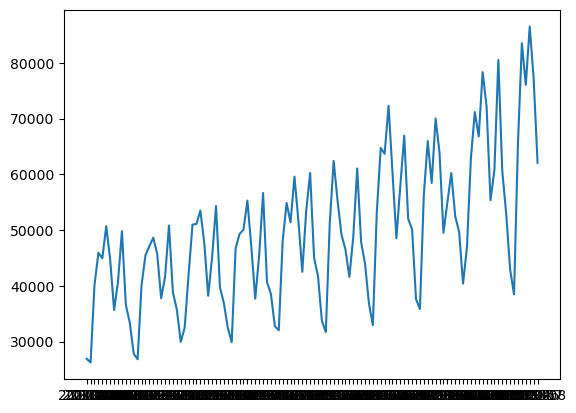

In [39]:
plt.plot(df_filter['기준년월'], df_filter['관광'])
plt.show()

In [40]:
df_filter.head(60)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
25,미국,26943,1195,2145,135,12647,43065,2010-01,아메리카,62.6,6.7
85,미국,26268,997,1315,391,12106,41077,2010-02,아메리카,63.9,5.9
145,미국,40143,1250,1533,61,11623,54610,2010-03,아메리카,73.5,7.4
205,미국,45939,1121,2424,48,10084,59616,2010-04,아메리카,77.1,8.5
265,미국,44951,1000,2205,77,11547,59780,2010-05,아메리카,75.2,8.6
325,미국,50711,1004,2314,68,10315,64412,2010-06,아메리카,78.7,9.7
385,미국,44732,947,1846,113,11805,59443,2010-07,아메리카,75.3,8.3
445,미국,35671,1183,1877,562,17084,56377,2010-08,아메리카,63.3,6.1
505,미국,40747,1119,1283,125,13030,56304,2010-09,아메리카,72.4,7.5
565,미국,49798,1327,1228,69,11534,63956,2010-10,아메리카,77.9,7.6


In [41]:
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else:
    print('Check your OS system')

In [55]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 2 to 6902
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국적        116 non-null    object 
 1   관광        116 non-null    int64  
 2   상용        116 non-null    int64  
 3   공용        116 non-null    int64  
 4   유학/연수     116 non-null    int64  
 5   기타        116 non-null    int64  
 6   계         116 non-null    int64  
 7   기준년월      116 non-null    object 
 8   대륙        116 non-null    object 
 9   관광객비율(%)  116 non-null    float64
 10  전체비율(%)   116 non-null    float64
 11  년도        116 non-null    object 
 12  월         116 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 12.7+ KB


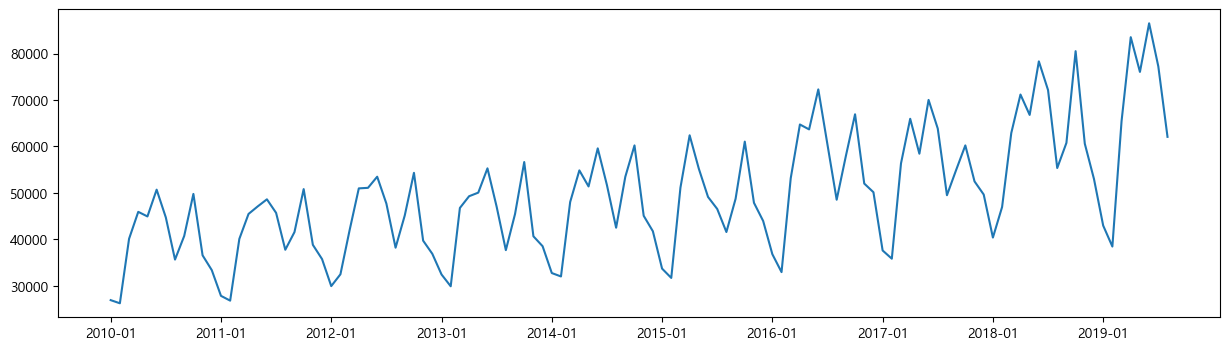

In [42]:
#그래프 크기 조절
plt.figure(figsize=(15, 4))
plt.plot(df_filter['기준년월'], df_filter['관광'])

plt.xticks(['2010-01', '2011-01','2012-01','2013-01','2014-01','2015-01',
            '2016-01','2017-01','2018-01','2019-01'])
plt.show()



In [43]:
cntry_list = ['중국', '일본', '대만', '미국', '홍콩']

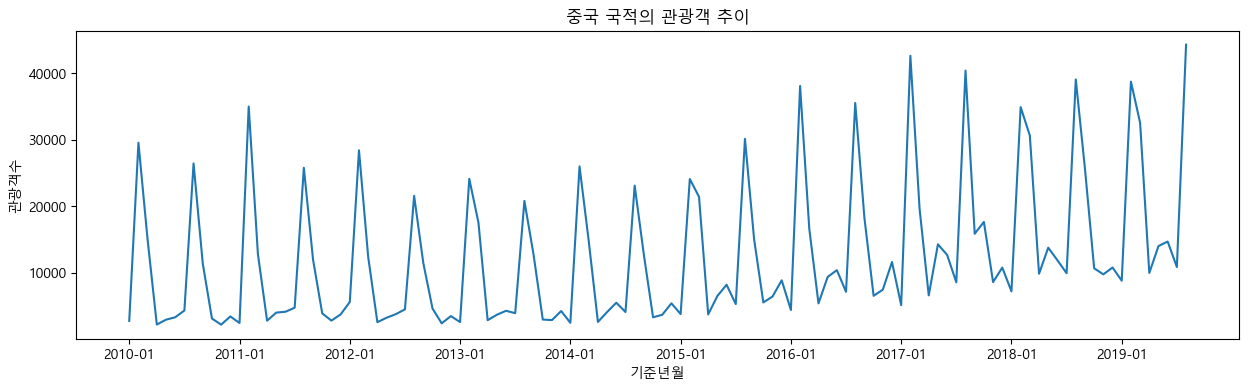

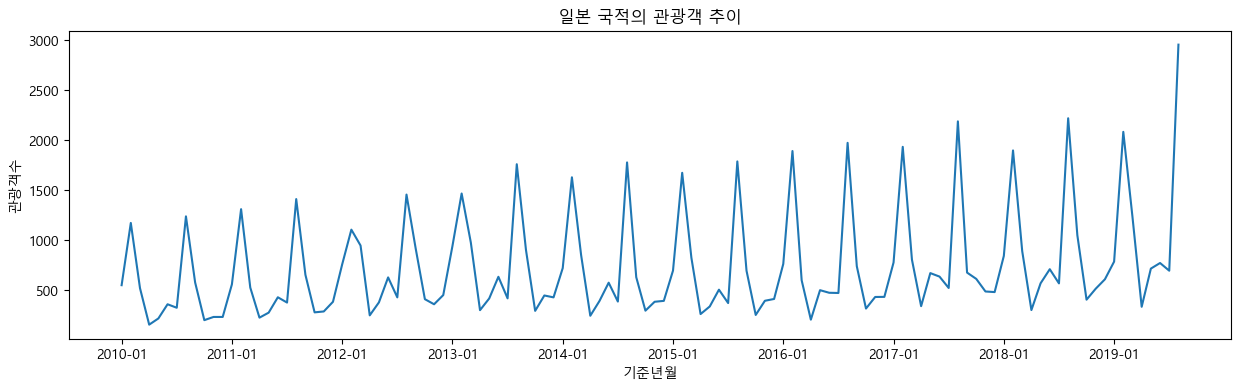

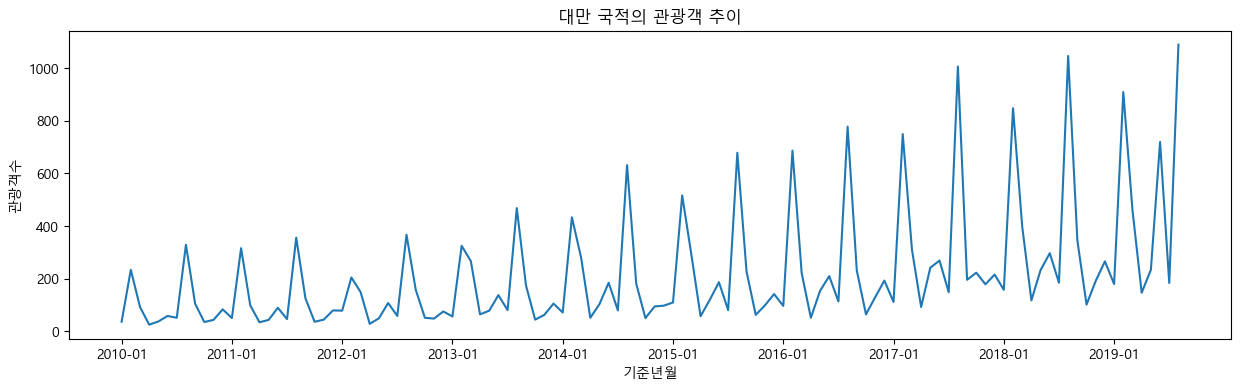

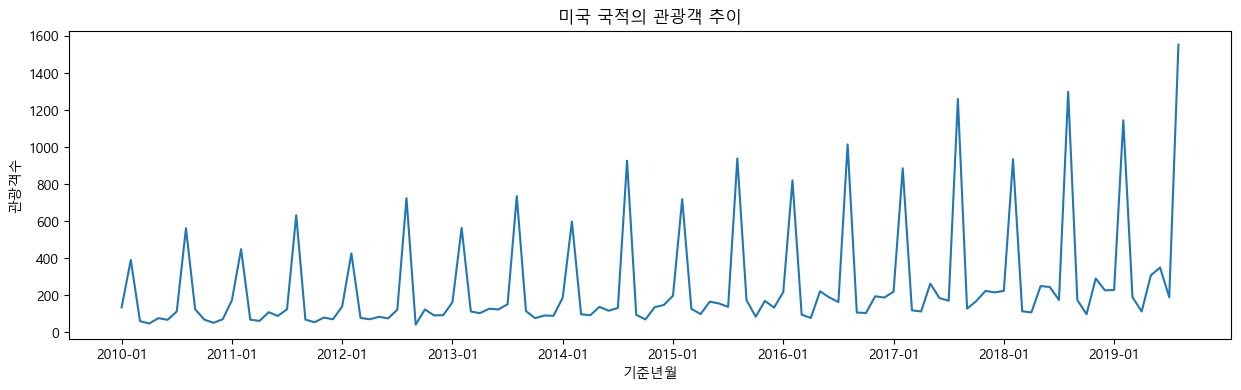

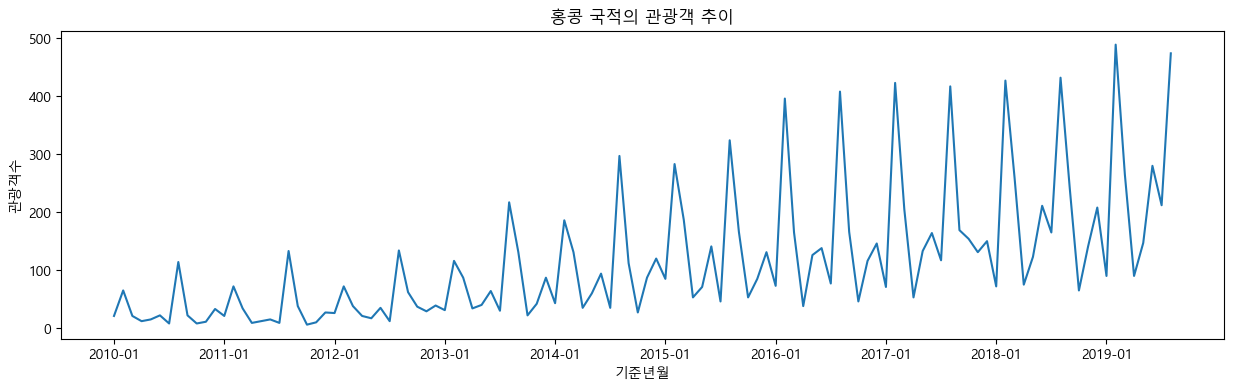

In [44]:
for cntry in cntry_list:
    #국적 관광객 추출하기
    condition = (df['국적'] == cntry)
    df_filter = df[condition]

    #그래프 그리기
    plt.figure(figsize=(15, 4))
    plt.plot(df_filter['기준년월'], df_filter['유학/연수'])

    plt.title('{} 국적의 관광객 추이'.format(cntry))
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')
    plt.xticks(['2010-01', '2011-01','2012-01','2013-01','2014-01','2015-01',
                '2016-01','2017-01','2018-01','2019-01'])
    plt.show()


In [45]:
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [46]:
#str.slice() 함수사용

In [47]:
df['년도'] = df['기준년월'].str.slice(0,4)
df['월'] = df['기준년월'].str.slice(5,7)
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3,2010,01


In [48]:
#중국 관광객 필터링
condition = (df['국적']=='중국')
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1,2010,01
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6,2010,02
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2,2010,03
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5,2010,04
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0,2010,05


In [49]:
df_pivot = df_filter.pivot_table(values = '관광', index='년도', columns='월')
df_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
년도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


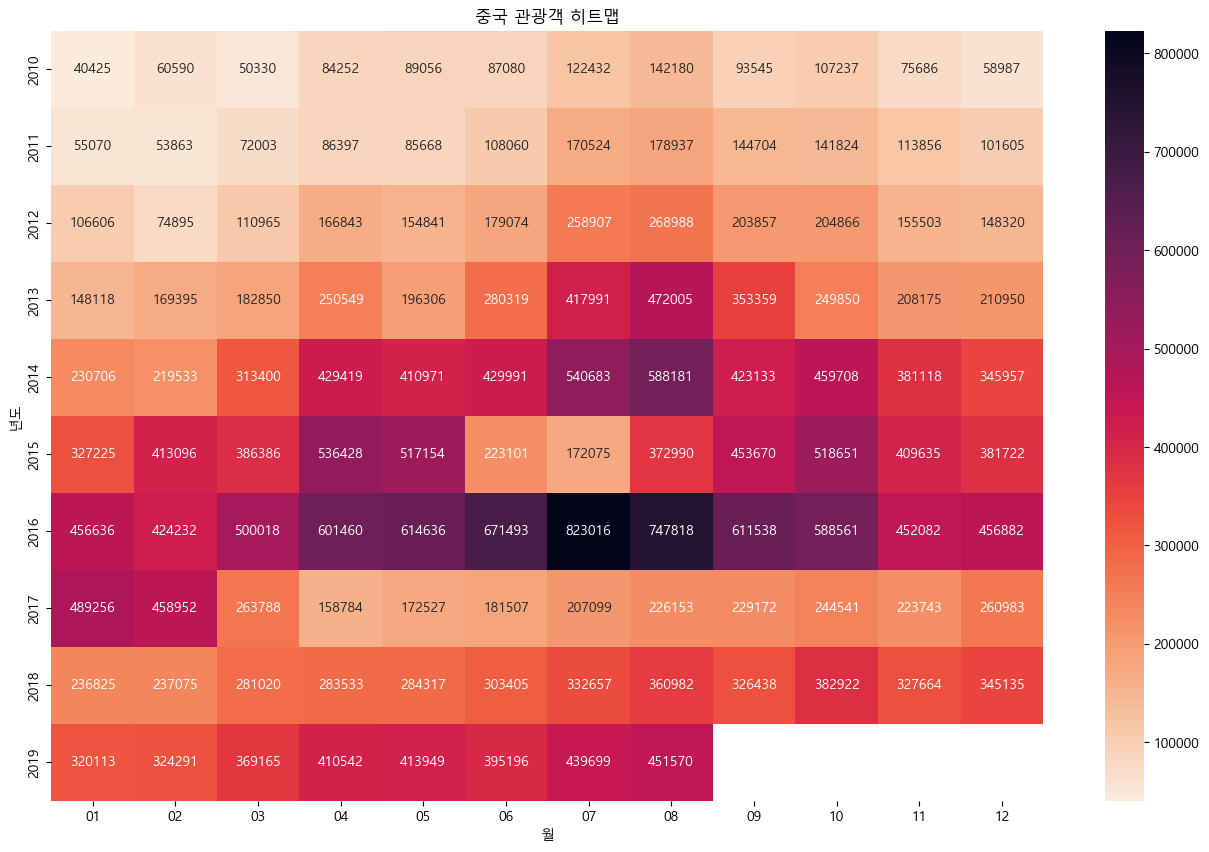

In [50]:
#히트맵
import seaborn as sns
plt.figure(figsize=(16,10))
sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='rocket_r')
plt.title('중국 관광객 히트맵')
plt.show()

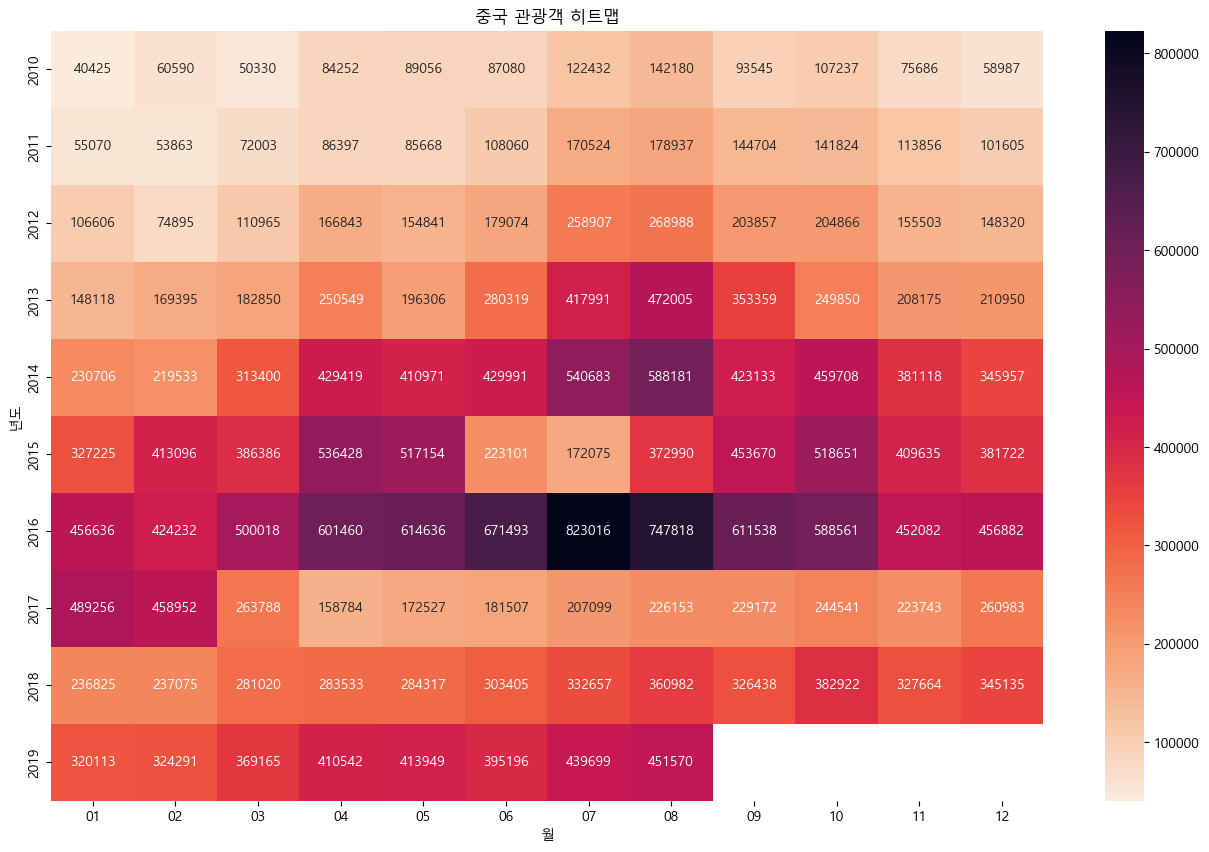

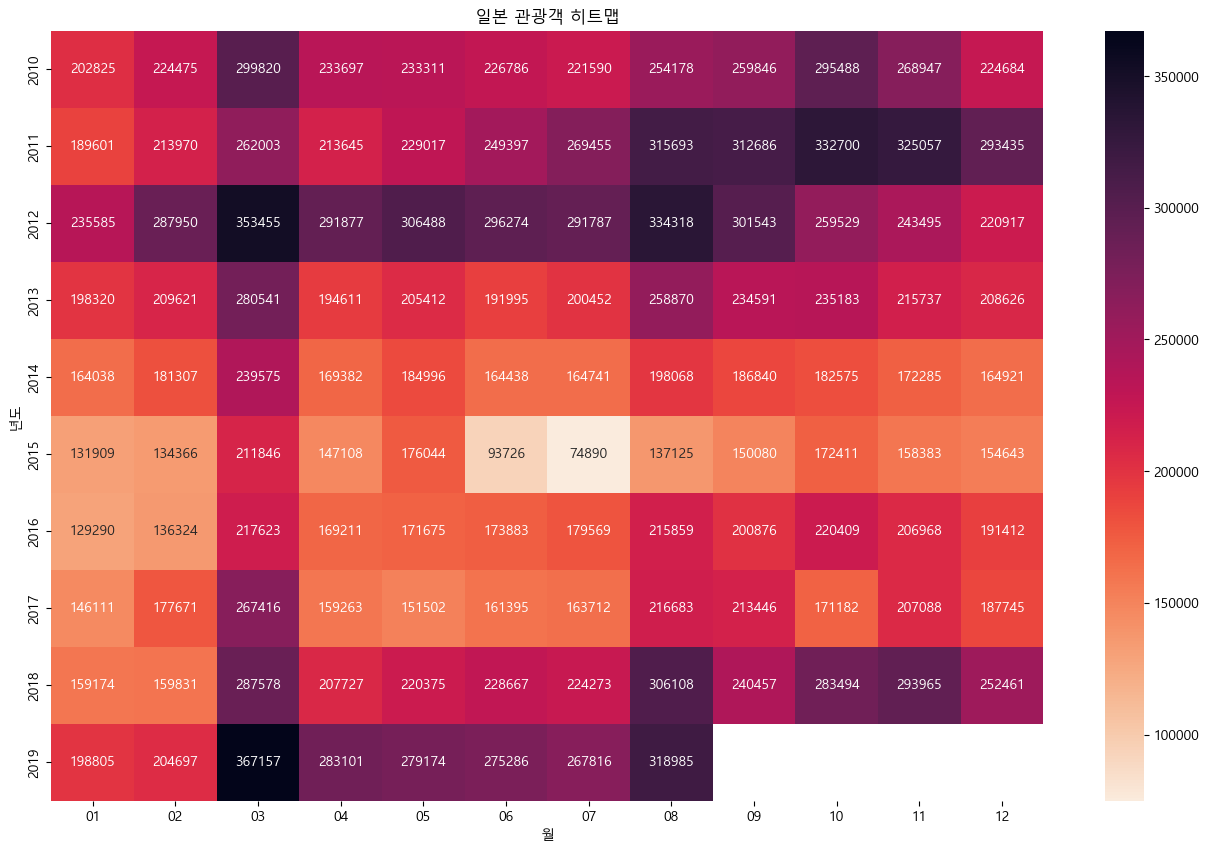

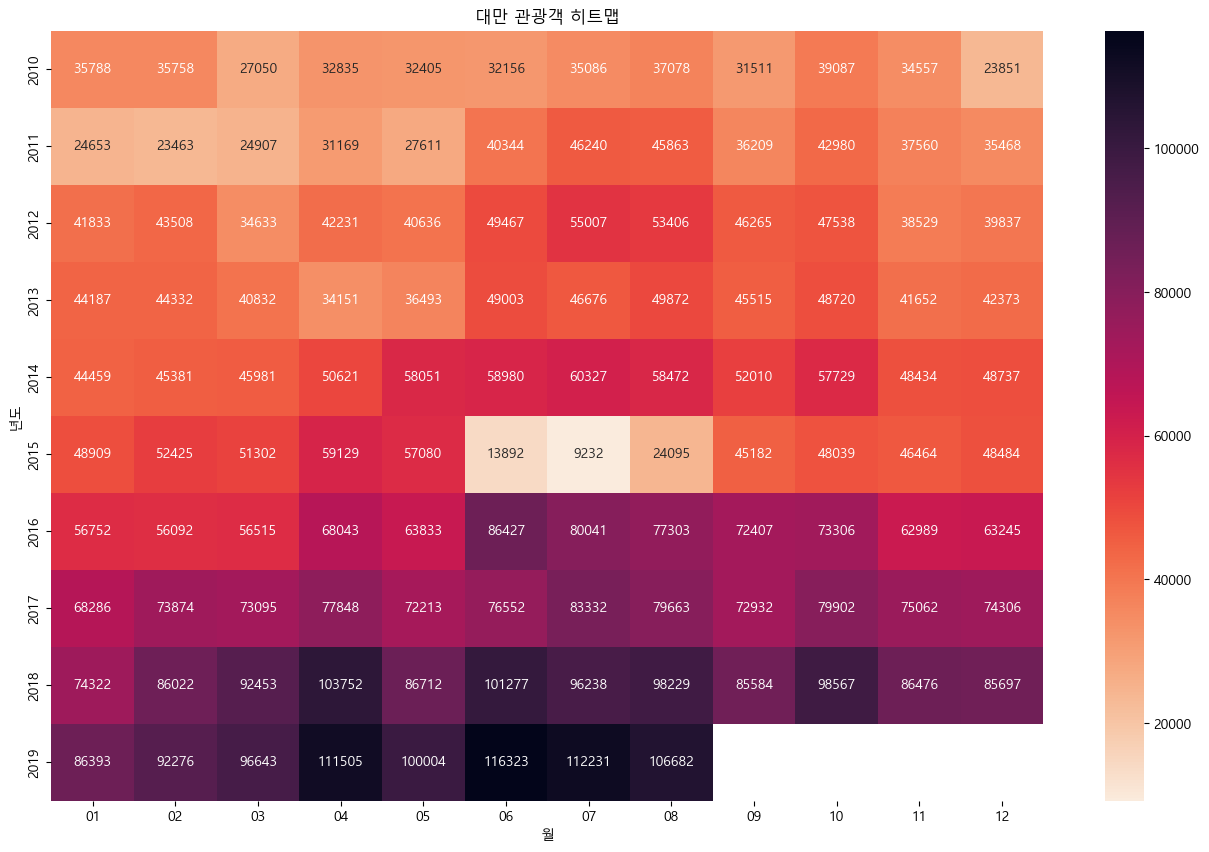

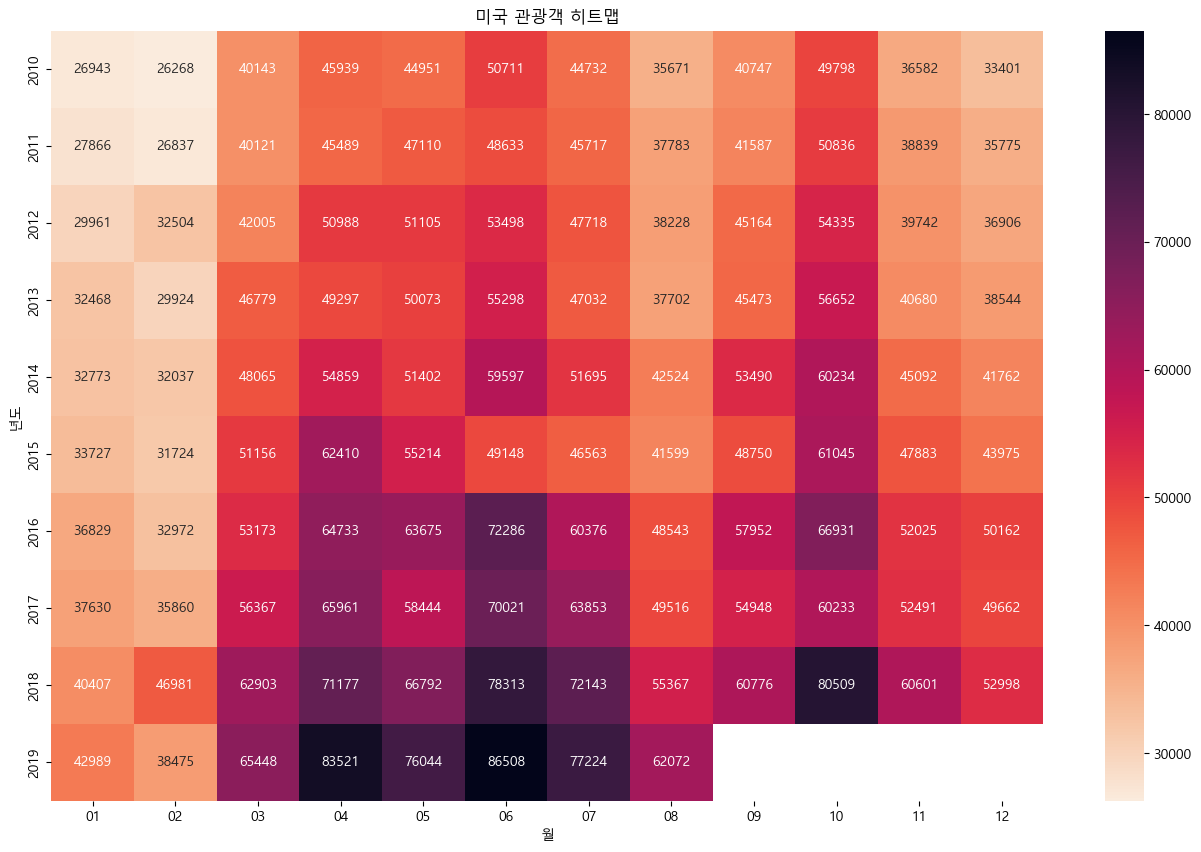

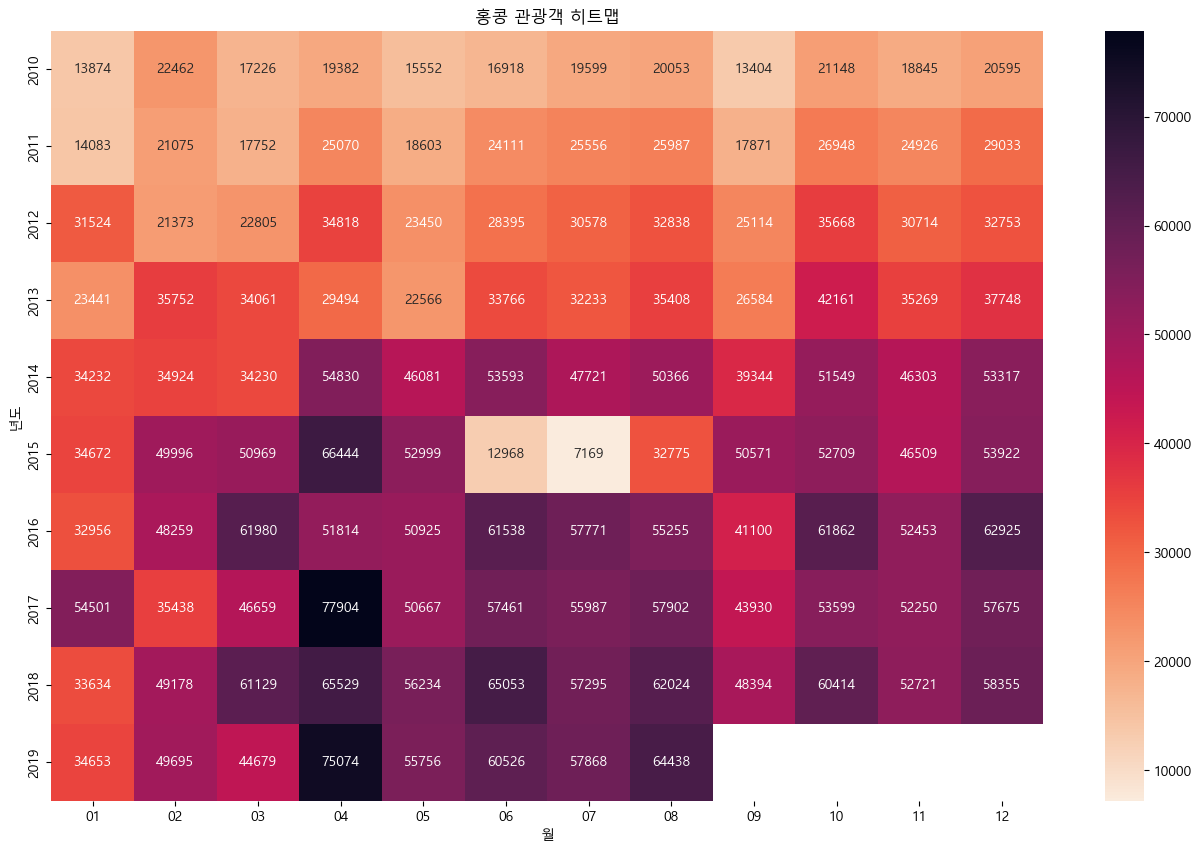

In [51]:
for cntry in cntry_list:
    #국적 관광객 추출하기
    condition = (df['국적'] == cntry)
    df_filter = df[condition]
    
    df_pivot = df_filter.pivot_table(values = '관광', index='년도', columns='월')

    #그래프 그리기
    plt.figure(figsize=(16, 10))
    plt.plot(df_filter['기준년월'], df_filter['관광'])
    sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='rocket_r')

    plt.title('{} 관광객 히트맵'.format(cntry))
    plt.show()


In [52]:
kto_201901.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,아시아주,765082,10837,1423,14087,125521,916950,2019-01
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01


In [53]:
kto_201901['국적'].unique()

array(['아시아주', '일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아',
       '싱가포르', '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골',
       '중국', '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미주',
       '미국', '캐나다', '멕시코', '브라질', '미주 기타', '구주', '영국', '독일', '프랑스',
       '네덜란드', '스웨덴', '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인',
       '그리스', '포르투갈', '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아',
       '불가리아', '폴란드', '구주 기타', '대양주', '오스트레일리아', '뉴질랜드', '대양주 기타',
       '아프리카주', '남아프리카공화국', '아프리카 기타', '기타대륙', '국적미상', '교포소계', '교포'],
      dtype=object)

In [54]:
kto_201901[kto_201901['국적'].str.contains('아시아')]

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,아시아주,765082,10837,1423,14087,125521,916950,2019-01
25,아시아 기타,1561,308,70,205,2410,4554,2019-01
